## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import datetime
import math

import sys
import os

pd.options.mode.chained_assignment = None

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option('display.max_colwidth', None)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
np.random.seed(311)

## Load Data

In [3]:
current_file_path = os.path.dirname(os.path.realpath('__file__'))
current_folder_name = 'code'

project_base_path = current_file_path.removesuffix(current_folder_name)
temperature_filepath = project_base_path + '/data/input/temperature data.xlsx'

In [4]:
temperature_df = pd.read_excel(
    temperature_filepath, 
    header = 1
)

temperature_df.head()

,Date,Time,Date/time,Room A,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB,Room B,GSW+MU.1,AFLH.1,AFLH+FB.1,GSW+FM.1,AFLH+MU.1,AFLN+FM.1,GSW+FB.1,AFLN+FB.1,AFLH+FM.1,AFLN+MU.1,Room C,AFLH+FM.2,GSW+FB.2,GSW+MU.2,AFLN+FM.2,GSW+FM.2,AFLH.2,AFLN+MU.2,AFLN+FB.2,AFLH+FB.2,AFLH+MU.2
0,2023-02-01,22:00:00,2023-02-01 22:00:00,20.5,15.2,13.3,13.7,15.3,15.6,17.7,15.1,13.8,14.5,21.9,20.4,14.2,17.3,15.3,15.1,15.1,13.4,14.7,13.4,15.1,12.9,20.7,18.1,14.5,19.4,13.4,14.8,16.9,12.7,13.5,15.0,14.8
1,2023-02-01,23:00:00,2023-02-01 23:00:00,20.8,15.2,13.4,13.8,15.4,15.7,17.8,15.1,13.9,14.5,21.9,20.5,14.2,17.4,15.3,15.1,15.2,13.5,14.7,13.5,15.2,13.0,20.9,18.1,14.6,19.4,13.5,14.9,17.0,12.8,13.6,15.1,14.8
2,2023-02-02,00:00:00,2023-02-02 00:00:00,21.0,15.2,13.5,14.0,15.5,15.8,17.9,15.2,14.1,14.6,22.0,20.7,14.3,17.5,15.4,15.1,15.2,13.6,14.8,13.6,15.2,13.0,21.1,18.2,14.6,19.4,13.7,14.9,17.2,12.9,13.7,15.1,14.9
3,2023-02-02,01:00:00,2023-02-02 01:00:00,21.1,15.3,13.5,14.1,15.6,15.8,18.0,15.2,14.2,14.6,22.1,20.8,14.3,17.6,15.5,15.2,15.3,13.7,14.8,13.7,15.3,13.1,21.2,18.2,14.6,19.5,13.8,14.9,17.3,13.0,13.8,15.2,15.0
4,2023-02-02,02:00:00,2023-02-02 02:00:00,21.3,15.3,13.7,14.2,15.7,15.9,18.0,15.2,14.4,14.7,22.1,21.0,14.4,17.7,15.6,15.2,15.4,13.9,14.8,13.9,15.4,13.2,21.4,18.3,14.7,19.5,14.0,15.0,17.4,13.2,13.9,15.3,15.1


In [5]:
temperature_df.shape

(2154, 36)

In [6]:
print('Columns:\n')
print(*temperature_df.columns, sep = ' ')

Columns:

Date Time Date/time Room A GSW+FM AFLN+MU AFLN+FB AFLH+FM AFLH+MU AFLH GSW+FB AFLN+FM GSW+MU AFLH+FB Room B GSW+MU.1 AFLH.1 AFLH+FB.1 GSW+FM.1 AFLH+MU.1 AFLN+FM.1 GSW+FB.1 AFLN+FB.1 AFLH+FM.1 AFLN+MU.1 Room C AFLH+FM.2 GSW+FB.2 GSW+MU.2 AFLN+FM.2 GSW+FM.2 AFLH.2 AFLN+MU.2 AFLN+FB.2 AFLH+FB.2 AFLH+MU.2


## Transform Dataframe for organizing blocks(bottles) better

Split dataset into subsets per each block(bottle)

In [7]:
temperature_df_subset_A = temperature_df[
    [
        'Date', 'Time', 'Date/time', 'Room A', 
        'GSW+FM', 'AFLN+MU', 'AFLN+FB',
       'AFLH+FM', 'AFLH+MU', 'AFLH', 
        'GSW+FB', 'AFLN+FM', 'GSW+MU', 'AFLH+FB'
    ]
]

temperature_df_subset_B = temperature_df[
    [
        'Date', 'Time', 'Date/time', 'Room B', 
        'GSW+MU.1', 'AFLH.1', 'AFLH+FB.1', 
        'GSW+FM.1', 'AFLH+MU.1', 'AFLN+FM.1', 
        'GSW+FB.1', 'AFLN+FB.1', 'AFLH+FM.1', 'AFLN+MU.1'
    ]
]

temperature_df_subset_C = temperature_df[
    [
        'Date', 'Time', 'Date/time', 'Room C', 
        'AFLH+FM.2', 'GSW+FB.2', 'GSW+MU.2', 
        'AFLN+FM.2', 'GSW+FM.2', 'AFLH.2', 
        'AFLN+MU.2', 'AFLN+FB.2', 'AFLH+FB.2', 'AFLH+MU.2'
    ]
]

In [8]:
temperature_df_subset_A.head()

,Date,Time,Date/time,Room A,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB
0,2023-02-01,22:00:00,2023-02-01 22:00:00,20.5,15.2,13.3,13.7,15.3,15.6,17.7,15.1,13.8,14.5,21.9
1,2023-02-01,23:00:00,2023-02-01 23:00:00,20.8,15.2,13.4,13.8,15.4,15.7,17.8,15.1,13.9,14.5,21.9
2,2023-02-02,00:00:00,2023-02-02 00:00:00,21.0,15.2,13.5,14.0,15.5,15.8,17.9,15.2,14.1,14.6,22.0
3,2023-02-02,01:00:00,2023-02-02 01:00:00,21.1,15.3,13.5,14.1,15.6,15.8,18.0,15.2,14.2,14.6,22.1
4,2023-02-02,02:00:00,2023-02-02 02:00:00,21.3,15.3,13.7,14.2,15.7,15.9,18.0,15.2,14.4,14.7,22.1


Transform columns into a common style:

Add a column indicating a block

In [9]:
temperature_df_subset_A['Block'] = 'A'
temperature_df_subset_B['Block'] = 'B'
temperature_df_subset_C['Block'] = 'C'

Remove block indicator

In [10]:
temperature_df_subset_A = temperature_df_subset_A.rename(columns = {'Room A': 'Room'})
temperature_df_subset_B = temperature_df_subset_B.rename(columns = {'Room B': 'Room'})
temperature_df_subset_C = temperature_df_subset_C.rename(columns = {'Room C': 'Room'})

Remove digits from column names for treatments

In [11]:
def remove_digits_from_column_names(df):
    df.columns = df.columns.str.replace('[\.\d]', '', regex = True)
    
remove_digits_from_column_names(temperature_df_subset_B)
remove_digits_from_column_names(temperature_df_subset_C)

Combine datasets with each block into one

In [12]:
temperature_df_transformed = pd.concat([
    temperature_df_subset_A, 
    temperature_df_subset_B,
    temperature_df_subset_C
], 
    ignore_index = True
)

In [13]:
temperature_df_transformed.head(10)

,Date,Time,Date/time,Room,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB,Block
0,2023-02-01,22:00:00,2023-02-01 22:00:00,20.5,15.2,13.3,13.7,15.3,15.6,17.7,15.1,13.8,14.5,21.9,A
1,2023-02-01,23:00:00,2023-02-01 23:00:00,20.8,15.2,13.4,13.8,15.4,15.7,17.8,15.1,13.9,14.5,21.9,A
2,2023-02-02,00:00:00,2023-02-02 00:00:00,21.0,15.2,13.5,14.0,15.5,15.8,17.9,15.2,14.1,14.6,22.0,A
3,2023-02-02,01:00:00,2023-02-02 01:00:00,21.1,15.3,13.5,14.1,15.6,15.8,18.0,15.2,14.2,14.6,22.1,A
4,2023-02-02,02:00:00,2023-02-02 02:00:00,21.3,15.3,13.7,14.2,15.7,15.9,18.0,15.2,14.4,14.7,22.1,A
5,2023-02-02,03:00:00,2023-02-02 03:00:00,21.4,15.4,13.7,14.3,15.8,16.0,18.1,15.3,14.5,14.7,22.2,A
6,2023-02-02,04:00:00,2023-02-02 04:00:00,21.5,15.4,13.8,14.5,15.9,16.1,18.2,15.3,14.6,14.8,22.3,A
7,2023-02-02,05:00:00,2023-02-02 05:00:00,21.6,15.5,14.0,14.6,16.0,16.2,18.3,15.4,14.8,14.9,22.4,A
8,2023-02-02,06:00:00,2023-02-02 06:00:00,21.7,15.5,14.1,14.7,16.1,16.2,18.4,15.4,14.9,14.9,22.4,A
9,2023-02-02,07:00:00,2023-02-02 07:00:00,21.9,15.6,14.2,14.9,16.2,16.3,18.4,15.5,15.0,15.0,22.5,A


## Data Cleaning

Convert Date to a pandas datetime object

In [14]:
temperature_df_transformed['Date'] = pd.to_datetime(
    temperature_df_transformed['Date']
)

temperature_df_transformed['Date/time'] = pd.to_datetime(
    temperature_df_transformed['Date/time']
)

Some records have unrealistic values for Date/time

In [15]:
temperature_df_transformed['Date/time'].min()

Timestamp('1970-01-01 00:00:00.000000045')

In [16]:
temperature_df_transformed[
    temperature_df_transformed['Date/time'] == temperature_df_transformed['Date/time'].min()
].head()

,Date,Time,Date/time,Room,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB,Block
2150,NaT,NaN,1970-01-01 00:00:00.000000045,0.0,68.0,209.0,410.0,435.0,0.0,279.0,198.0,678.0,122.0,377.0,A
4304,NaT,NaN,1970-01-01 00:00:00.000000045,0.0,0.0,317.0,529.0,497.0,0.0,0.0,214.0,652.0,140.0,383.0,B
6458,NaT,NaN,1970-01-01 00:00:00.000000045,0.0,0.0,210.0,617.0,465.0,0.0,0.0,173.0,707.0,316.0,382.0,C


Remove the records with unrealistic or missing values for Date and time

In [17]:
n_records_before_cleaning_dates = temperature_df_transformed.shape[0]

In [18]:
temperature_df_transformed.drop(
    temperature_df_transformed[
        temperature_df_transformed['Date/time'] <= np.datetime64('2000-01-01 00:00:00.000000045')
    ].index,
    inplace = True
)

In [19]:
temperature_df_transformed['Date/time'].min()

Timestamp('2023-02-01 22:00:00')

In [20]:
n_records_after_cleaning_dates = temperature_df_transformed.shape[0]

In [21]:
difference = n_records_before_cleaning_dates - n_records_after_cleaning_dates

print(
    f'{difference} rows have been removed'
)

12 rows have been removed


In [22]:
print('Columns:\n')
print(*temperature_df_transformed.columns.tolist(), sep = ' ')

Columns:

Date Time Date/time Room GSW+FM AFLN+MU AFLN+FB AFLH+FM AFLH+MU AFLH GSW+FB AFLN+FM GSW+MU AFLH+FB Block


Column 'Time' is redundant, we can drop it

In [23]:
temperature_df_transformed.drop('Time', axis = 1, inplace = True)

We want to have a column counting number of hours as a part of a day from the start of the experiment for visualization

In [24]:
starting_time = temperature_df_transformed['Date/time'].min()

temperature_df_transformed['Relative_time'] = temperature_df_transformed[
    'Date/time'
] - starting_time

temperature_df_transformed['Hours'] = (
    (
        temperature_df_transformed[
            'Relative_time'
        ].dt.days
    ) * 24 + (
        temperature_df_transformed[
            'Relative_time'
        ].dt.components['hours']
    ) + 1
) / 24

And we want to have a column counting number of days from the start of the experiment for taking an average per day

In [25]:
starting_day = temperature_df_transformed['Date'].min()

temperature_df_transformed['Day'] = (
    temperature_df_transformed['Date'] - starting_day
).dt.days.astype(int)

temperature_df_transformed.head()

,Date,Date/time,Room,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB,Block,Relative_time,Hours,Day
0,2023-02-01,2023-02-01 22:00:00,20.5,15.2,13.3,13.7,15.3,15.6,17.7,15.1,13.8,14.5,21.9,A,0 days 00:00:00,0.041667,0
1,2023-02-01,2023-02-01 23:00:00,20.8,15.2,13.4,13.8,15.4,15.7,17.8,15.1,13.9,14.5,21.9,A,0 days 01:00:00,0.083333,0
2,2023-02-02,2023-02-02 00:00:00,21.0,15.2,13.5,14.0,15.5,15.8,17.9,15.2,14.1,14.6,22.0,A,0 days 02:00:00,0.125000,1
3,2023-02-02,2023-02-02 01:00:00,21.1,15.3,13.5,14.1,15.6,15.8,18.0,15.2,14.2,14.6,22.1,A,0 days 03:00:00,0.166667,1
4,2023-02-02,2023-02-02 02:00:00,21.3,15.3,13.7,14.2,15.7,15.9,18.0,15.2,14.4,14.7,22.1,A,0 days 04:00:00,0.208333,1


We want to get averages per block for each experiment

In [26]:
columns = temperature_df_transformed.columns.tolist()
columns = [c for c in columns if c not in ['Block', 'Date']]

temperature_df_transformed = temperature_df_transformed[
    columns
].groupby(['Date/time']).mean()

And here we get an average per day

In [27]:
temperature_df_transformed = temperature_df_transformed.groupby(['Day']).mean()

temperature_df_transformed.head(48)

,Room,GSW+FM,AFLN+MU,AFLN+FB,AFLH+FM,AFLH+MU,AFLH,GSW+FB,AFLN+FM,GSW+MU,AFLH+FB,Relative_time,Hours
Day,,,,,,,,,,,,,
0.0,20.633333,15.050000,13.016667,13.583333,16.200000,15.200000,17.350000,14.783333,13.583333,16.033333,17.416667,0 days 00:30:00,0.062500
1.0,21.856944,15.818056,14.388889,15.144444,17.372222,16.240278,18.441667,15.584722,15.347222,16.981944,17.195833,0 days 13:30:00,0.604167
2.0,21.573611,17.466667,16.966667,19.266667,19.572222,18.286111,20.523611,17.361111,19.805556,18.941667,18.383333,1 days 13:30:00,1.604167
3.0,20.890278,18.333333,21.704167,29.616667,25.413889,24.113889,28.254167,18.327778,37.452778,20.022222,23.415278,2 days 13:30:00,2.604167
4.0,22.237500,18.868056,28.381944,39.888889,35.730556,31.930556,36.127778,18.897222,52.688889,20.618056,34.730556,3 days 13:30:00,3.604167
5.0,20.786111,19.994444,32.550000,49.048611,42.369444,36.683333,41.041667,19.726389,57.823611,21.525000,42.262500,4 days 13:30:00,4.604167
6.0,19.129167,20.993056,34.204167,55.452778,45.705556,39.013889,43.286111,19.637500,57.734722,21.780556,46.176389,5 days 13:30:00,5.604167
7.0,18.943056,22.746528,34.425694,57.953472,47.738194,40.188889,44.011806,19.383333,59.038889,22.800694,48.241667,6 days 13:30:00,6.604167
8.0,19.161111,25.415278,33.933333,57.829167,49.338889,40.626389,43.538889,19.586111,58.437500,25.901389,49.365278,7 days 13:30:00,7.604167


## Change of requirements

We don't need the treatments below anymore due to change of requirements. Therefore we can drop them

In [28]:
not_needed_treatments = ['AFLH+FM', 'AFLH+FB', 'AFLH+MU', 'AFLH']

In [29]:
temperature_df_transformed.drop(
    columns = not_needed_treatments, 
    inplace = True
)

In [30]:
temperature_df_transformed.columns

Index(['Room', 'GSW+FM', 'AFLN+MU', 'AFLN+FB', 'GSW+FB', 'AFLN+FM', 'GSW+MU',
       'Relative_time', 'Hours'],
      dtype='object')

We need to change the treatments that begin with “AFLN” to “AF” to correspond to the text in the article

In [31]:
temperature_df_transformed = temperature_df_transformed.rename(
    columns = { 
        'AFLN+MU': 'AF+MU', 
        'AFLN+FB': 'AF+FB', 
        'AFLN+FM': 'AF+FM', 
              }
)

We also need to change the treatments that begin with “GSW” to “GS”

In [32]:
temperature_df_transformed = temperature_df_transformed.rename(
    columns = { 
        'GSW+FM': 'GS+FM', 
        'GSW+FB': 'GS+FB', 
        'GSW+MU': 'GS+MU',
              }
)

## Visualize Temperature

Select treatments to visualize

In [33]:
temperature_columns = [ 
    'AF+FB', 'GS+FB',
    'AF+FM', 'GS+FM', 
    'AF+MU', 'GS+MU'
]

In [34]:
def plot_temperature(df, date_column, column, ax, plot_room_temperature):
    
    is_room_temperature_plotted = False
    
    if plot_room_temperature:
        columns = [column, date_column, 'Room']
    else:
        columns = [column, date_column]
    
    ax.plot(date_column, column, data = df, color = 'tab:orange')
    
    if plot_room_temperature and not is_room_temperature_plotted:

        ax.plot(date_column, 'Room', data = df, color = 'tab:gray')
    
    ax.set_title(column, loc = 'center', fontsize = 'medium')
    ax.set_ylabel('')
    ax.set_xlabel('Days')
    ax.grid(True)
    
    for label in ax.get_xticklabels():
        label.set_ha('right')
        label.set_color('tab:gray')
        label.set_size(8)

In [35]:
def plot_temperature_for_multiple_columns(
    df,
    date_column,
    title = 'Temperature per treatment',
    plot_room_temperature = True,
    columns = temperature_columns
):
    n = math.ceil(len(temperature_columns) / 2)
    
    fig = plt.figure(figsize = (11, 4 * n))
    fig.subplots_adjust(hspace = 0.6, wspace = 0.5)
    
    fig.suptitle(
        title, 
        color = 'royalblue', 
        fontsize = 16,
        y = 0.93
    )

    for i, col in enumerate(temperature_columns):

        ax = fig.add_subplot(n, 2, i + 1)
        plot_temperature(df, date_column, col, ax, plot_room_temperature)

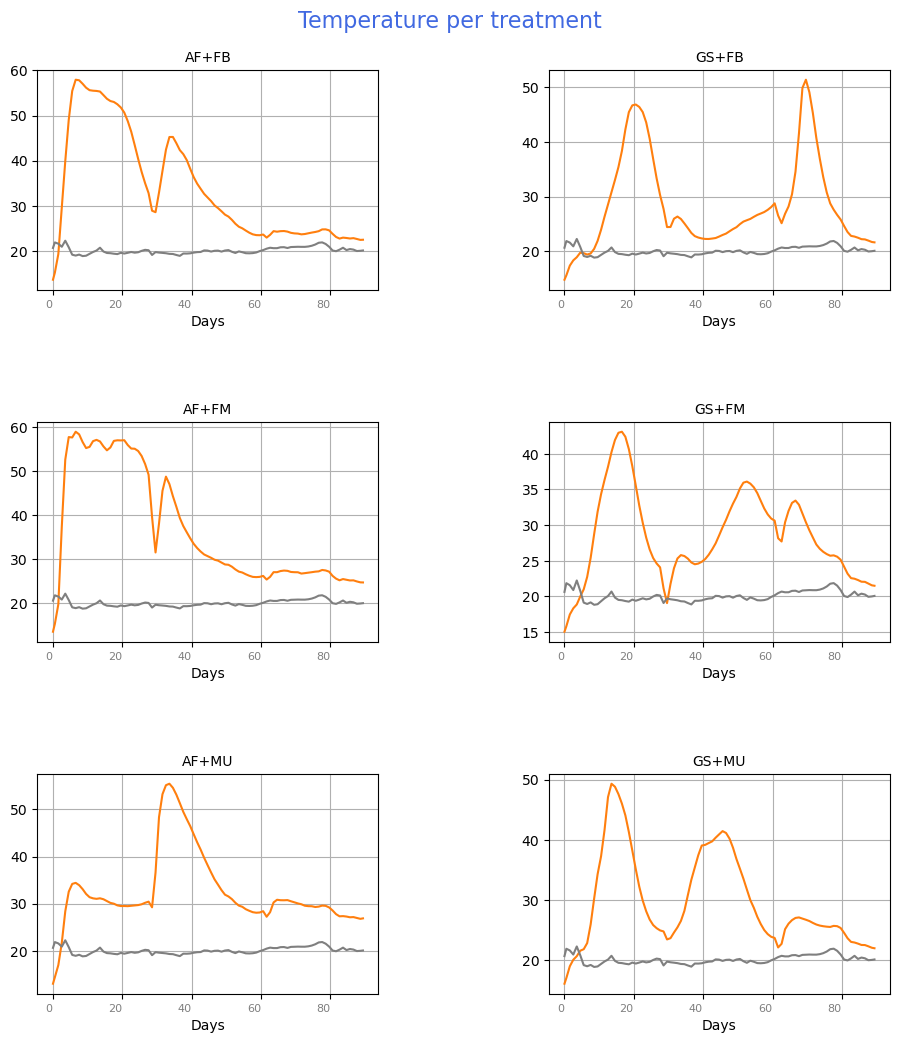

In [36]:
plot_temperature_for_multiple_columns(temperature_df_transformed, 'Hours')

## Parameters for Accumulated Temperature

We transform dataset according to the method described in this research paper: [Thermal Load and Application](https://uomustansiriyah.edu.iq/media/lectures/5/5_2020_02_14!09_55_55_PM.pdf)

Set parameters

In [37]:
ROOM_TEMPERATURE = 20
THERMOPHILIC_TEMPERATURE = 45
TEMPERATURE_TO_STERILIZE = 55

In [38]:
temperature_columns

['AF+FB', 'GS+FB', 'AF+FM', 'GS+FM', 'AF+MU', 'GS+MU']

## Methods for accumulating temperature

1. Calculate the difference between treatment temperature and base (reference) temperature
2. If the treatment temperature is lower than the base (reference) temperature use 0

In [39]:
def get_temperature_relative_to_base_temperature(data, column, base_temperature):
    
    return np.where(
        ((data[column] - base_temperature) <= 0), 
        0, 
        data[column] - base_temperature
    )

Calculate accumulated(integral) treatment temperature when it has values above the base temperature

In [40]:
def get_accumulated_temperature(data, column, base_temperature): 
    
    data['temp_column'] = data[column].cumsum()   
    data[column] = data['temp_column']
    data.drop('temp_column', axis = 1, inplace = True)
    
    return data

Calculate accumulated temperature per each block(bottle) and combine subsets together into one dataset

In [41]:
def get_accumulated_temperature_for_all_columns(
    data, 
    base_temperature,
    columns = temperature_columns
):
        
    for temp_column in columns:
        data = get_accumulated_temperature(
            data, temp_column, base_temperature
        )
    
    return data
    

In [42]:
def get_dataset_with_accumulated_temperature(
    data, 
    base_temperature,
    columns = temperature_columns
):
    for col in columns:
        data[col] = get_temperature_relative_to_base_temperature(
            data, 
            col,
            base_temperature
        )
        
    selected_columns = ['Hours']
    selected_columns.extend(columns)

    data = data[selected_columns]
        
    data = get_accumulated_temperature_for_all_columns(data, base_temperature, columns)
    return data

## Accumulated Temperature Based on Room

In [43]:
base_temperature = ROOM_TEMPERATURE

In [44]:
title = 'accumulated temperature'

In [45]:
room_cumulative_temperature_df = temperature_df_transformed.copy()

In [46]:
room_cumulative_temperature_df = get_dataset_with_accumulated_temperature(
    room_cumulative_temperature_df, 
    base_temperature,
    columns = temperature_columns
)

Visualize the accumulated temperature per treatment

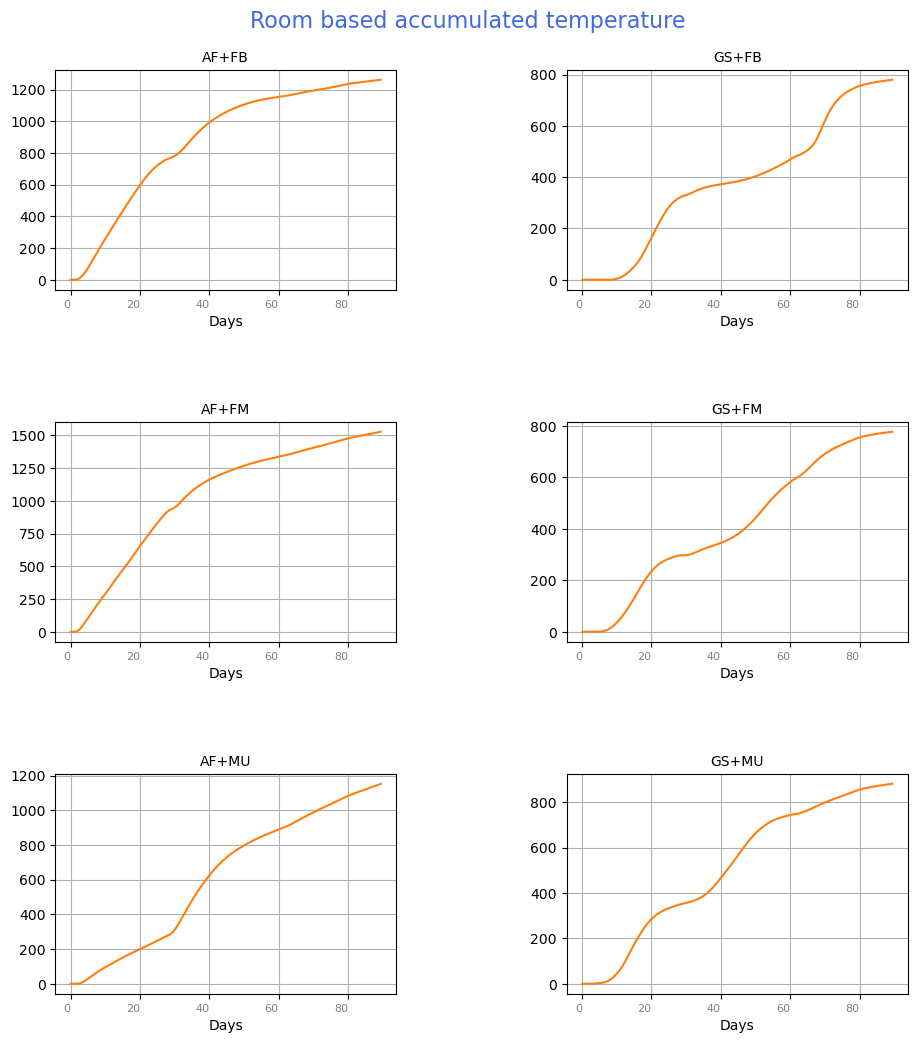

In [47]:
plot_temperature_for_multiple_columns(
    room_cumulative_temperature_df, 
    'Hours', 
    title = 'Room based ' + title,
    plot_room_temperature = False
)

## Accumulated Temperature Based on Thermophilic

In [48]:
base_temperature = THERMOPHILIC_TEMPERATURE

In [49]:
thermophilic_cumulative_temperature_df = temperature_df_transformed.copy()

In [50]:
thermophilic_cumulative_temperature_df = get_dataset_with_accumulated_temperature(
    thermophilic_cumulative_temperature_df, 
    base_temperature,
    columns = temperature_columns
)

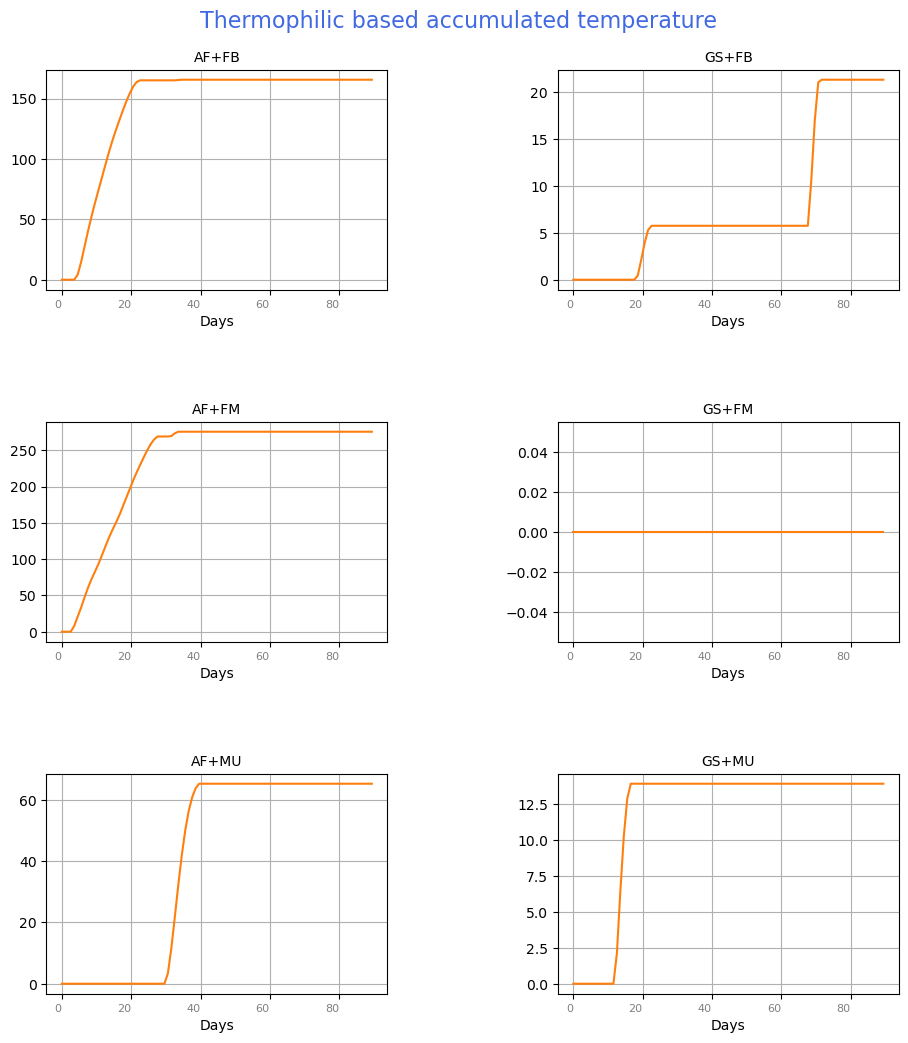

In [51]:
plot_temperature_for_multiple_columns(
    thermophilic_cumulative_temperature_df, 
    'Hours', 
    title = 'Thermophilic based ' + title,
    plot_room_temperature = False
)

## Accumulated Temperature Based on Sterilize

In [52]:
base_temperature = TEMPERATURE_TO_STERILIZE

In [53]:
sterilize_cumulative_temperature_df = temperature_df_transformed.copy()

sterilize_cumulative_temperature_df = get_dataset_with_accumulated_temperature(
    sterilize_cumulative_temperature_df, 
    base_temperature,
    columns = temperature_columns
)

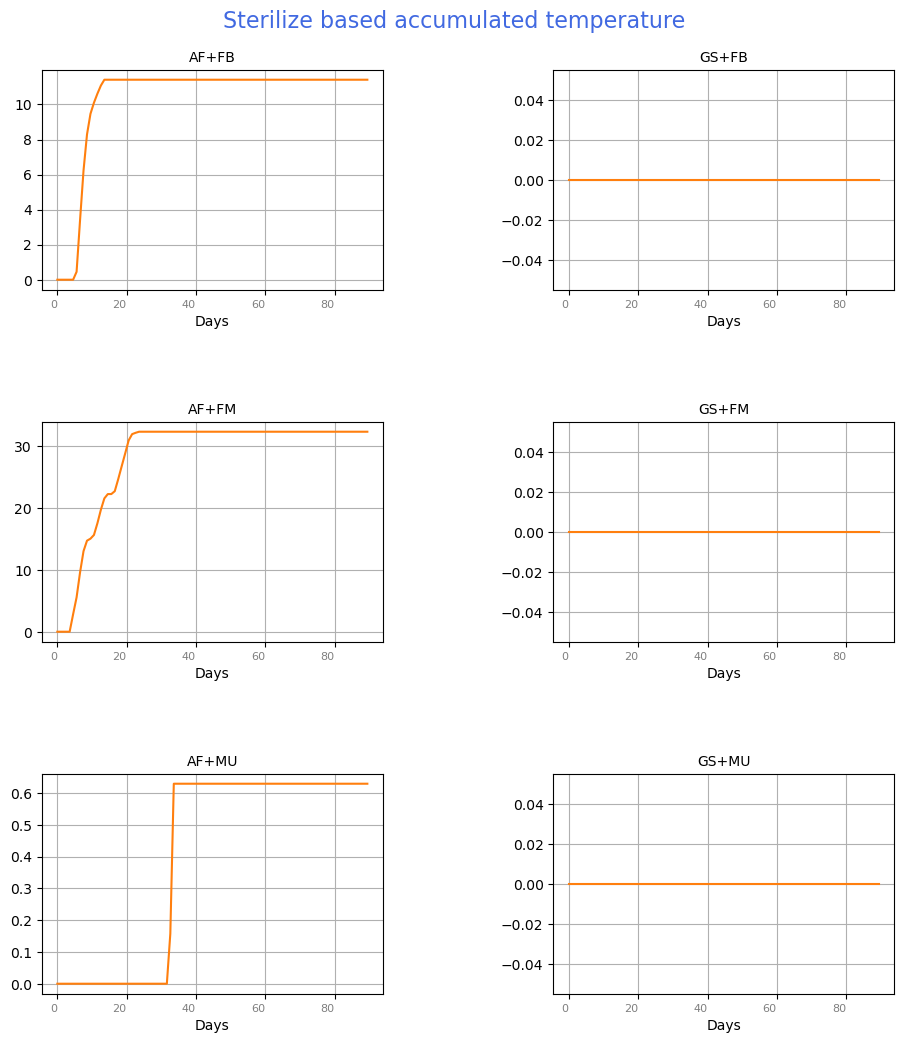

In [54]:
plot_temperature_for_multiple_columns(
    sterilize_cumulative_temperature_df, 
    'Hours', 
    title = 'Sterilize based ' + title,
    plot_room_temperature = False
)

## Save data

In [55]:
cumulative_temperature_dataframes = {
    'room based cumulative temperature average.xlsx': room_cumulative_temperature_df,
    'thermophilic cumulative temperature average.xlsx': thermophilic_cumulative_temperature_df,
    'sterilize cumulative temperature average.xlsx': sterilize_cumulative_temperature_df
}

In [56]:
output_data_filepath = project_base_path + '/data/output/'
task_filepath = 'Average Accumulated Temperature Generation in relation to Base/'

In [57]:
for local_file_path, dataframe in cumulative_temperature_dataframes.items():
    
    filepath = output_data_filepath + task_filepath + local_file_path
    dataframe.to_excel(filepath, index = False)